<a href="https://colab.research.google.com/github/tassiewilco/Custom_R_Functions/blob/main/TrialHydrophoneAnalysisColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Signals

### pull some data from github

In [ ]:
"we import (=clone) all the data or just update (=pull) them"

import os

if not os.path.exists("assets_signal"):
    print("the directory assets_signal is create")
    !git clone https://github.com/vincentvigon/assets_signal
else:
    print("the directory assets_signal is updated")
    %cd assets_signal
    !git pull https://github.com/vincentvigon/assets_signal
    %cd ..


the directory assets_signal is create
Cloning into 'assets_signal'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 277 (delta 0), reused 37 (delta 0), pack-reused 239
Receiving objects: 100% (277/277), 51.11 MiB | 33.44 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [1]:
"connect to google drive where the wav files are stored"
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### basic imports

In [2]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import IPython

np.set_printoptions(linewidth=500,precision=3,suppress=True)
plt.style.use("default")

## Sounds

### Import a sound file

I want to import and export sound file with python. How can I do?

I ask to google ->  "python read write sound files"

Often, the best place to see the answer is stackoverflow. I look at the debates:

* Some people say that `PySoundFile` is the more complete lib.
* But I see that `scipy` has also a `io.wavfile` package. Because I already have `scipy`, I try it in first. It is OK to import sounds, but not so good to export them: the generate sounds cannot be easily open.
* so finaly, I used  `PySoundFile`


In [3]:
!pip install PySoundFile

In [6]:
"load sound file"
"recall: samplerate is the number of measures make in one second"

import soundfile as sf
sound, samplerate = sf.read('/content/drive/MyDrive/Hydrophones Chile/20240615_170805.WAV')
sound.shape,samplerate

((14400000,), 48000)

The sound is stereo: it has two columns=two channels: the left one and the right one.

Let's plot this signal. Oscilations are so fast, that we only see their contours. Such plot is called  "waveform" (forme d'onde), and allows to see when the sound is loud or quiet.

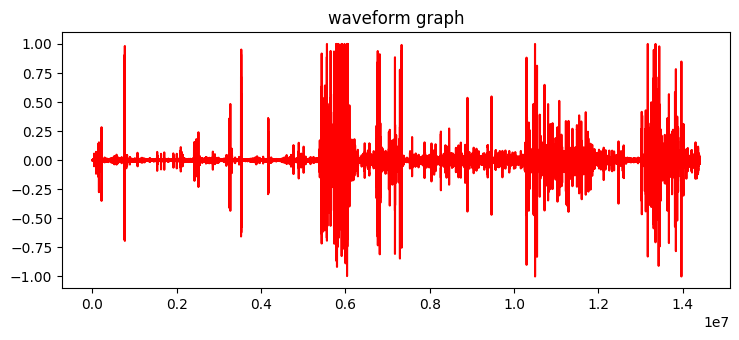

In [20]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("waveform graph")
plt.plot(range(1,14400001),sound, color="red")
fig.tight_layout()



***To you:***

* $(1\heartsuit)$ What is the duration of this sound.
* $(1\heartsuit)$ Add xticks on the above plot which indicate the time.
* $(2\heartsuit)$ Plot the very begining of this signal, to see clearly the oscilations.

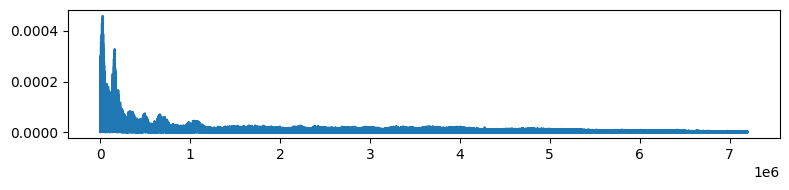

In [21]:
"we plot the half-amplitude-spectrum"
half_spectrum=np.fft.rfft(sound)
fig,ax=plt.subplots(figsize=(8,2))
N=len(half_spectrum)
freqs=np.linspace(0,samplerate/2,N)
ax.plot(np.abs(half_spectrum)/N);

***To you:*** $(1\heartsuit)$ What is the meaning of the pick at 0 ?

To hear the sound:

In [24]:
IPython.display.Audio('/content/drive/MyDrive/Hydrophones Chile/20240615_170805.WAV')

### Spectrogram

To analyse long signal, it is often better to make a spectrogram than a simple Fourier Transform. Here is the process:

* We cut the signal in short slices, sufficiently short so that, in every slice, the signal is homogenious (like a simple mixture of sinus-waves).
* Then we compute the fft for every slice.
*  fft are stack as in columns of a matrix
* This matrix is plot with a colormap.

Such process is also called a "time-frequency analysis"

In [30]:
!pip install scipy.signal

from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
"https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ShortTimeFFT.html#scipy.signal.ShortTimeFFT"
"scipy.signal.ShortTimeFFT(win, hop, fs, *, fft_mode='onesided', mfft=None, dual_win=None, scale_to=None, phase_shift=0)[source]"



g_std = 8  # standard deviation for Gaussian window in samples
w = gaussian(50, std=g_std, sym=True)  # symmetric Gaussian window
SFT = ShortTimeFFT(w, hop=10, fs=48000, mfft=200, scale_to='magnitude')
Sx = SFT.stft(sound)  # perform the STFT




ERROR: Could not find a version that satisfies the requirement scipy.signal (from versions: none)
ERROR: No matching distribution found for scipy.signal


ImportError: cannot import name 'ShortTimeFFT' from 'scipy.signal' (/usr/local/lib/python3.10/dist-packages/scipy/signal/__init__.py)

***To you:*** $(3\heartsuit)$ Plot the spectrogram of some  short sounds of your choice (put it before in your working directory). Try to link what you hear and what you see.

Text(0.5, 0, 'Time [sec]')

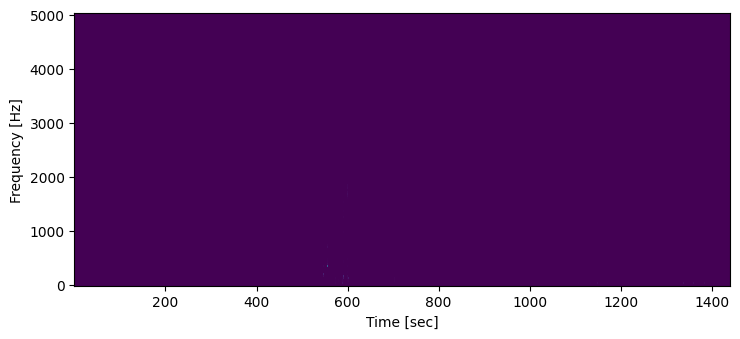

In [26]:
#example with born to be wilde
f, t, Sxx = scipy.signal.spectrogram(sound, 1/epsilon)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

***A vous:*** Où voit-on que le chanteur utilise des "effets de voix"?

### Exo: Sound filtering

In [ ]:
sound, samplerate = sf.read('assets_signal/sound_surprise.wav')
sound.shape,samplerate

((44100,), 44100)

In [ ]:
IPython.display.Audio('assets_signal/sound_surprise.wav')

***To you:***
* What is the duration of the signal. Justify!
* Plot the whole sound, with the good scale of time
* Plot the very begining of this sound, to see the oscillations.
* Plot the half-amplitude-spectrum with the good scale of frequencies
* What is the musical name of this sound. How many "harmonics"?
* With the help of fft, suppress all harmonics to keep only a "pure"
sound.  
* Transform the initial sound to make a "crescendo" effect (= more and more loud)
* Plot the spectrogram of the transformed sound

## Pics detection

### Rappel sur les strides

In [ ]:
import numpy as np

v=np.zeros([10],np.uint8)
print(v.strides)


v=np.zeros([10,15],np.uint8)
print(v.strides)

(1,)
(15, 1)


In [ ]:
v=np.zeros([10],np.float32)
print(v.strides)


v=np.zeros([10,15],np.float32)
print(v.strides)

(4,)
(60, 4)


### Make a rolling window

In [ ]:
def rolling_window(data, window_length):
    output_shape = data.shape[:-1] + (data.shape[-1] - window_length + 1, window_length)
    strides = data.strides + (data.strides[-1],)
    return np.lib.stride_tricks.as_strided(data, shape=output_shape, strides=strides)

In [ ]:
data=np.arange(0,11,1)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
roll=rolling_window(data,3)
roll

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10]])

In [ ]:
roll.shape

(9, 3)

***To you:*** $(2\heartsuit)$ Give the formula which links the shapes of  input and output of `rolling_window()`.  A drawing with a long vector, and a rolling window inside could help you to understand.

***To you:*** $(1\heartsuit)$ what does the `rolling_window()` function when the input `data` is not a vector, but a general `ndarray` (ex: a matrix).

### Version tensorflow

Voici une version faite à la main en tensorflow, essentiellement on utilise un reshape. Mais attention, en tensorflow, cela implique une copie des datas.

In [ ]:
import tensorflow as tf

def make_consecutive_windows(Z,window_size):
    def make_windows(Z, window_size):
        batch_size, nb_t = Z.shape[0], Z.shape[1]
        nb_windows = nb_t // window_size
        Z = Z[:, :window_size * nb_windows]
        Z = tf.reshape(Z, (batch_size, nb_windows, window_size) + Z.shape[2:])
        return Z

    res=[]
    nb_t=Z.shape[1]
    end_shape=Z.shape[2:]

    Z=Z[:,:nb_t // window_size * window_size - 1] #on racoursi un peu pour que tous les découpages aient le même nombre de tranche
    for i in range(window_size): #attention, on s'arrête avant window_size
        res.append(make_windows(Z[:,i:],window_size))
    res=tf.stack(res,axis=3) #

    bs,nb_windows=res.shape[0],res.shape[1]

    res=tf.reshape(res, (bs, nb_windows * window_size,window_size) + end_shape)
    return res

def test_consecutive_windows():
    """
    On teste avec des entrées de dimension 4 puis 3
    Le résultat doit être
    [[ 0.  1.  2.  3.  4.]
     [ 1.  2.  3.  4.  5.]
     [ 2.  3.  4.  5.  6.]
     [ 3.  4.  5.  6.  7.]
     [ 4.  5.  6.  7.  8.]
     [ 5.  6.  7.  8.  9.]
     [ 6.  7.  8.  9. 10.]
     [ 7.  8.  9. 10. 11.]
     [ 8.  9. 10. 11. 12.]
     [ 9. 10. 11. 12. 13.]
     [10. 11. 12. 13. 14.]
     [11. 12. 13. 14. 15.]
     [12. 13. 14. 15. 16.]
     [13. 14. 15. 16. 17.]
     [14. 15. 16. 17. 18.]]
    """
    b, nb_t, nb_part, dimX=1,20,1,1
    window_size=5

    T=tf.cast(tf.range(nb_t),tf.float32)
    X=tf.ones([b,nb_t , nb_part, dimX])

    X=X*T[None,:,None,None]
    print("X",X[0,:,0,0])

    X_w=make_consecutive_windows(X,window_size) #b,nb_window*window_size (all shift),window_size,nb_part,dimX
    print("X_w",X_w[0,:,:,0,0])

    dimY=1
    Y=tf.ones([b,nb_t,dimY])
    Y=Y*T[None,:,None]
    Y_w=make_consecutive_windows(Y,window_size)

    print("Y_w",Y_w[0,:,:,0])

test_consecutive_windows()

X tf.Tensor(
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.], shape=(20,), dtype=float32)
X_w tf.Tensor(
[[ 0.  1.  2.  3.  4.]
 [ 1.  2.  3.  4.  5.]
 [ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]
 [ 7.  8.  9. 10. 11.]
 [ 8.  9. 10. 11. 12.]
 [ 9. 10. 11. 12. 13.]
 [10. 11. 12. 13. 14.]
 [11. 12. 13. 14. 15.]
 [12. 13. 14. 15. 16.]
 [13. 14. 15. 16. 17.]
 [14. 15. 16. 17. 18.]], shape=(15, 5), dtype=float32)
Y_w tf.Tensor(
[[ 0.  1.  2.  3.  4.]
 [ 1.  2.  3.  4.  5.]
 [ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]
 [ 7.  8.  9. 10. 11.]
 [ 8.  9. 10. 11. 12.]
 [ 9. 10. 11. 12. 13.]
 [10. 11. 12. 13. 14.]
 [11. 12. 13. 14. 15.]
 [12. 13. 14. 15. 16.]
 [13. 14. 15. 16. 17.]
 [14. 15. 16. 17. 18.]], shape=(15, 5), dtype=float32)


***A vous:*** Traduisez cette fonction en numpy.

### To find the local max

In [ ]:
def findLocalMax(data,windowLength):
    dataRoll=rolling_window(data,windowLength)
    print(dataRoll.shape)
    armax=np.argmax(dataRoll,axis=1)
    print(armax.shape)
    where=np.where(armax==(windowLength//2))
    print(where)
    return where[0]+windowLength//2

(16, 5)
(16,)
(array([ 2, 10]),)
[ 4 12]


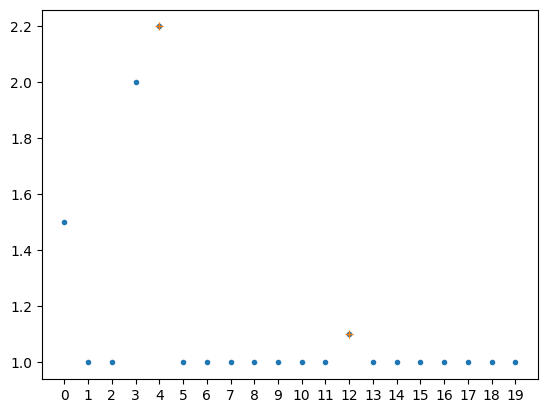

In [ ]:
data=np.ones(20)
data[0]=1.5
data[3]=2
data[4]=2.2
data[12]=1.1
plt.plot(range(len(data)),data,".");
plt.xticks(range(len(data)));

locMax=findLocalMax(data,5)
print(locMax)
plt.plot(locMax,data[locMax],"+");

***To you:***
* $(2\heartsuit)$ Explain how `findLocalMax()` works, in particular: What is the influence of the `windowLength` and why is it better to choose an odd integer.
* $(3\heartsuit)$ This function does not detect the picks if they are situated at the extremities of the `data` vector. Modify its, adding the optionnal arg `alsoDetectBorderPick=True`.

### On a physical signal

Here is a physical signal with two channels. With a simple observation left and right channels seem completly different.

In [ ]:
signal_phy, samplerate = sf.read('assets_signal/Sample.wav')
signal_phy.shape,samplerate

((1440000, 2), 48000)

In [ ]:
def plot_a_part(x,y,index):
    fig,(ax0,ax1)=plt.subplots(2,1,figsize=(8,4),sharex=True)
    ax0.plot(x[:index],y[:index,0])
    ax1.plot(x[:index],y[:index,1])
    ax0.set_title("left")
    ax1.set_title("right")
    fig.tight_layout()

In [ ]:
N=len(signal_phy)
t=np.linspace(0,N*samplerate,N)

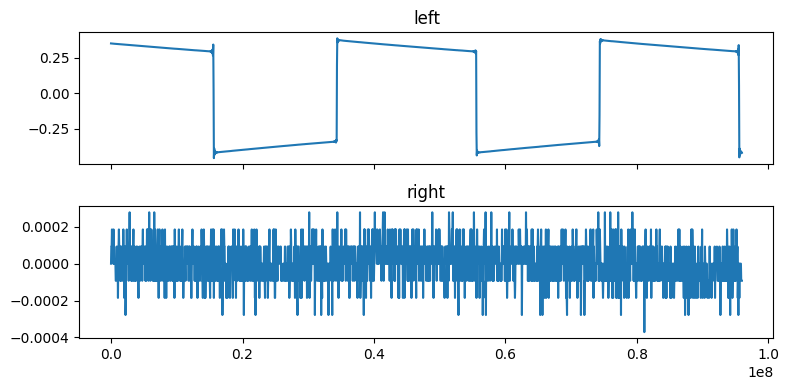

In [ ]:
plot_a_part(t,signal_phy,2000)

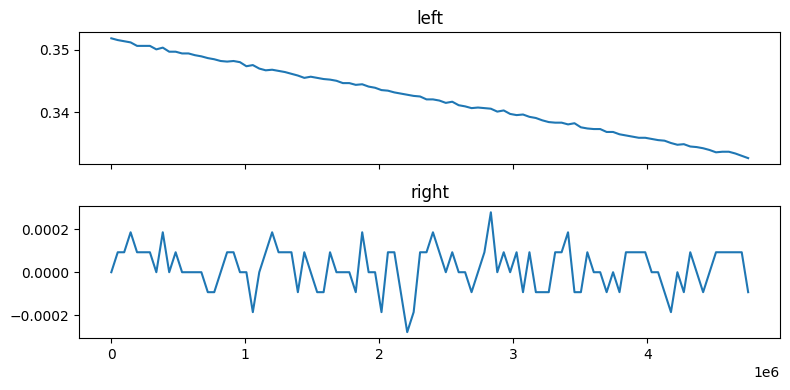

In [ ]:
plot_a_part(t,signal_phy,100)

The left channel is quite regular, while the right one move a lot. But let's observe their respective Fourier transform.

In [ ]:
spectrum_phy0=np.fft.rfft(signal_phy[:,0])
spectrum_phy1=np.fft.rfft(signal_phy[:,1])
spectrum_phy=np.stack([spectrum_phy0,spectrum_phy1],axis=1)
spectrum_phy.shape

(720001, 2)

Warning: the code

        spectrum_phy=np.fft.rfft(signal_phy)

would not gives what we expect (Grrrr).

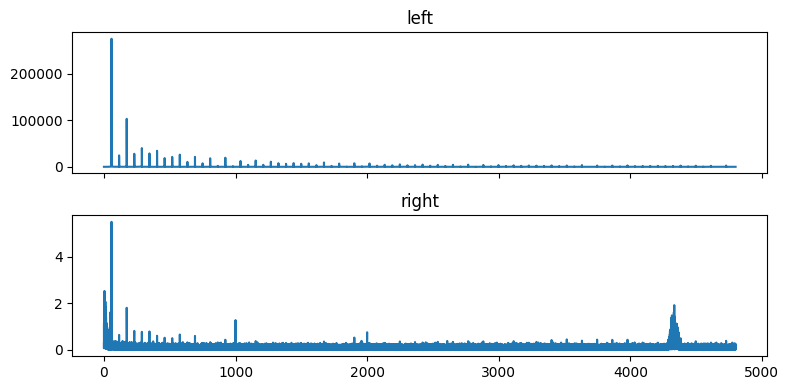

In [ ]:
freqs=np.linspace(0,samplerate/2,len(spectrum_phy))
plot_a_part(freqs,np.abs(spectrum_phy),N//10)

In [ ]:
plot_a_part(freqs,np.abs(spectrum_phy),N//100)


We see that the two signals are actualy strongly correlated: they have the same pick of frequencies.

Explanation:

* the left signal is an electric signal, generated with an electronic device. Its is use to exitate a liquid

* the right signal is the output of a sensor dived in the liquid.


***To you:*** Detect the pics of both signals.
* $(2\heartsuit)$ Superpose this pic with the signals
* $(2\heartsuit)$  Superpose left and right pics to compare them


***To you:*** $(2\heartsuit)$ Describe a technic of extreme compression for sounds, which allows to say if two sounds are close or not.

Example: your technic could says if two signals are actually two recordings of the song "toxic" by "Britney Spear".

If you would had this idea before 2012, you would been the inventor of the famous software "shazam".   


